In [10]:
from analyse_output import *

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# --- Minergie community
folder_data = './output/minergie_8bldg_comm/MarketRTP_only/noPV_noEV_RES//'
filename = 'planning_data_0.csv'
folder_data_price = folder_data
filename_price = 'GT.json'

# ----Default
# folder_data = './output/'
# filename = 'planning_data.csv'
# folder_data_price = '../config/type_dr_simu_config/'
# filename_price = 'GT.json'

df_data_sb, df_data_res = get_clean_output(folder_data, filename)
actors_ids = df_data_sb['SG_ENTITY_ID'].unique().tolist() + df_data_res['SG_ENTITY_ID'].unique().tolist()

# Price simu
price_data = get_resample_price(folder_data_price, filename_price)

# Output
### --- CALL THE ANALYSIS OF THE ALGO --- ###

indiv_data = analyse_algo_per_round(df_data_sb, df_data_res, price_data)


LIN = 19.5279792258 | QUAD = 0.0
Community cost function: 29.0714772976
LIN = 17.4723745075 | QUAD = 0.0
Community cost function: 27.9293876727
LIN = 15.3182047453 | QUAD = 0.0
Community cost function: 26.7560125915
LIN = 13.2896472353 | QUAD = 0.0
Community cost function: 25.6342932597
LIN = 11.669119279 | QUAD = 0.0
Community cost function: 24.7249725997
LIN = 11.0275883761 | QUAD = 0.0
Community cost function: 24.3662097639
LIN = 10.8582118815 | QUAD = 0.0
Community cost function: 24.2965357585
LIN = 10.6791812824 | QUAD = 0.0
Community cost function: 24.212744154
LIN = 10.5776949594 | QUAD = 0.0
Community cost function: 24.1637599667
LIN = 10.5776949594 | QUAD = 0.0
Community cost function: 24.1637599667
LIN = 10.5776949594 | QUAD = 0.0
Community cost function: 24.1637599667
LIN = 10.5776949594 | QUAD = 0.0
Community cost function: 24.1637599667
LIN = 10.5776949594 | QUAD = 0.0
Community cost function: 24.1637599667
LIN = 10.5776949594 | QUAD = 0.0
Community cost function: 24.16375

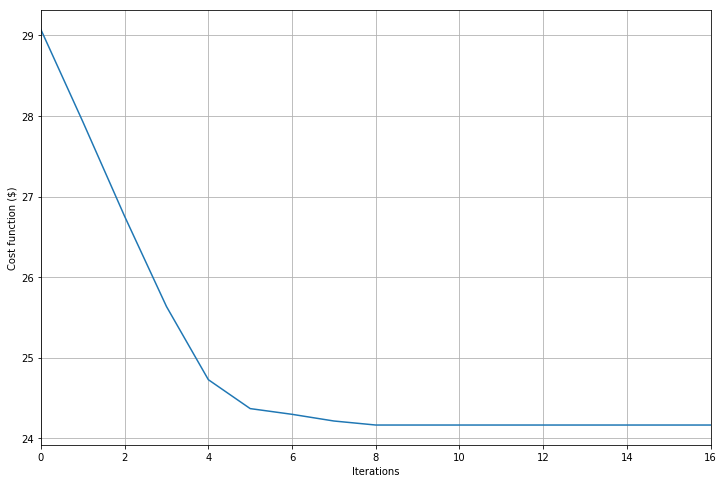

In [11]:
# GRAPHS
community_obj_fct = []

for d in indiv_data:
    community_obj_fct.append(sum([x_pos for x_pos, x_neg in d.values()]))

# - PLOT OF THE COMMUNITY COST FUNCTION EVOLUTION

plt.figure(figsize=(12,8))
ax = plt.plot(range(len(community_obj_fct)), community_obj_fct) # , marker='o'
plt.xlabel('Iterations')
plt.ylabel('Cost function ($)')
# plt.xticks(range(len(indiv_data)))
plt.xlim(0, len(indiv_data)-1)
# plt.ylim(0, max(community_obj_fct))
plt.grid()
# plt.show()

plt.savefig(folder_data+'convergence_rate.eps', format='eps')

# - PLOT OF THE INDIVIDUAL COST FUNCTION EVOLUTION
# plt.figure()
# for i in actors_ids:
#     cost_fct_evol = [y[i][0] - y[i][1] for y in indiv_data]
#     ax = plt.plot(range(len(indiv_data)), cost_fct_evol, marker='o', label="ID {}".format(i))
# plt.xlabel('Round number')
# plt.ylabel('Cost function ($)')
# # plt.xticks(range(len(indiv_data)))
# plt.xlim(0, len(indiv_data)-1)
# plt.legend()
# plt.grid()
# plt.show()


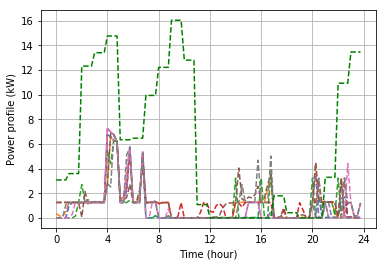

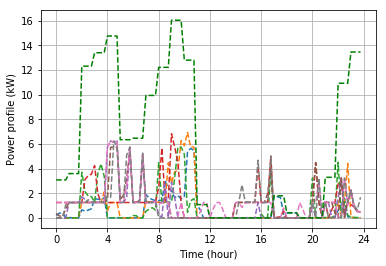

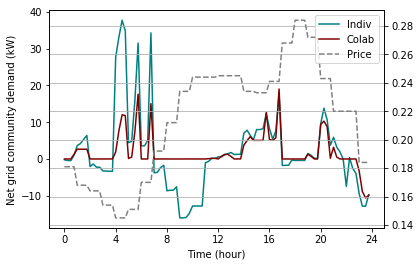

In [12]:
# -
# --- Load profile graphs ----- #
# -

def plot_individuals_profiles(data_df, **kwargs):
    time_vector = range(0,96)
    plt.figure() #figsize=(8,6)

    for i, data in data_df.iterrows():
        if data["SG_ENTITY_ID"] == 1000:
            ax = plt.plot([x/4.0 for x in time_vector], [abs(y)/1000.0 for y in data["FORECAST_DATA"]], '--', color='green')
        else:
            ax = plt.plot([x/4.0 for x in time_vector], [y/1000.0 for y in data["FORECAST_DATA"]], '--')

    plt.xticks(range(0,25,4))

    plt.xlabel('Time (hour)')
    plt.ylabel('Power profile (kW)')
    plt.grid()
    
    if 'savefig' in kwargs.keys():
        plt.savefig(folder_data+'{}.eps'.format(kwargs['savefig']), format='eps')
    else:
        plt.show()

def get_aggr_sig(data_df):
    return sum([np.array([y/1000.0 for y in data["FORECAST_DATA"]]) for k, data in data_df.iterrows()])
    
def plot_aggregated_profiles(list_data_df, **kwargs):
    time_vector = [x/4.0 for x in range(0,96)]

    fig, ax1 = plt.subplots()
    lns = []
    graph_color = ['teal','maroon']
    # Aggregation of power signals
    for i, data_df in enumerate(list_data_df):
        aggr = sum([np.array([y/1000.0 for y in data["FORECAST_DATA"]]) for k, data in data_df.iterrows()])
        lns += ax1.plot(time_vector, aggr, '-', label=kwargs['label'][i], color=graph_color[i])
    
    if 'yaxis' in kwargs.keys():
        plt.ylabel(kwargs['yaxis'])
    else:
        plt.ylabel('Power profile (kW)')
            
    plt.xticks(range(0,25,4))
    plt.xlabel('Time (hour)')
    
    # Energy price
    if 'energy_price' in kwargs.keys():
        price_sig = kwargs['energy_price']
        ax2 = ax1.twinx()
        lns += ax2.plot(time_vector, price_sig, linestyle='--', color='grey', label='Price')
        labs = [l.get_label() for l in lns]
        ax2.legend(lns, labs, loc=1)
        plt.xlabel('Energy price ($/kWh)')

    plt.grid()
    
    if 'savefig' in kwargs.keys():
        plt.savefig(folder_data+'{}.eps'.format(kwargs['savefig']), format='eps')
    else:
        plt.show()
    
# -- No collaboration
df_data_sb_no_colab = df_data_sb[df_data_sb["CYCLE"] == 0].append(df_data_res)

# -- Final consensus
df_data_sb_optimal_coop = df_data_sb[df_data_sb["CYCLE"] == max(df_data_sb["CYCLE"])].append(df_data_res)

# --- GRAPH: individuals
plot_individuals_profiles(df_data_sb_no_colab, savefig='no_colab_indiv_profile')
plot_individuals_profiles(df_data_sb_optimal_coop, savefig='colab_indiv_profile')

# --- GRAPH: Aggregated
plot_aggregated_profiles([df_data_sb_no_colab, df_data_sb_optimal_coop], 
                         label=['Indiv', 'Colab'], 
                         energy_price=price_data['energy_price'], 
                         yaxis="Net grid community demand (kW)", savefig='aggr_profiles')

In [30]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [26]:
df_data_sb_no_colab

CYCLE                                      FORECAST_DATA  \
0    0.0  [0.0810360533069, 0.00942015404707, 0.00755344...   
1    0.0  [0.0861190423893, 0.00997891522993, 0.00767478...   
2    0.0  [0.0433817547164, 0.00756420047987, 0.00841966...   
3    0.0  [0.028343267375, 0.00817606222806, 0.006147498...   
4    0.0  [359.835442241, 156.956805844, 127.858615616, ...   
5    0.0  [1250.78253404, 1250.79644111, 1250.89258084, ...   
6    0.0  [0.0701956653938, 0.0162228874517, 0.025269576...   
7    0.0  [1255.55582836, 1257.67915708, 1260.18974126, ...   
1    NaN  [-3083.43061067, -3083.43061067, -3083.4306106...   

                                 FORECAST_TIMESTAMPS  SG_ENTITY_ID  TIME  \
0  0,900,1800,2700,3600,4500,5400,6300,7200,8100,...             1  -900   
1  0,900,1800,2700,3600,4500,5400,6300,7200,8100,...             2  -900   
2  0,900,1800,2700,3600,4500,5400,6300,7200,8100,...             5  -900   
3  0,900,1800,2700,3600,4500,5400,6300,7200,8100,...             3  -900   
4  0,900,1800,2700,3600,4500,5400,6300,7200,8100,...             6  -900   
5  0,900,1800,2700,3600,4500,5400,6300,7200,8100,...             7  -900   
6  0,900,1800,2700,3600,4500,5400,6300,7200,8100,...             8  -900   
7  0,900,1800,2700,3600,4500,5400,6300,7200,8100,...             4  -900   
1  0,900,1800,2700,3600,4500,5400,6300,7200,8100,...          1000  -900   

   index  
0    2.0  
1    3.0  
2    4.0  
3    5.0  
4    6.0  
5    7.0  
6    8.0  
7    9.0  
1    NaN

In [19]:
# Compute useful metrics

# --- RES consumption

def compute_localres_consumption(algo_snapshot_df):
    
    sold_to_grid = sum([-min(x,0) for x in get_aggr_sig(algo_snapshot_df)])
    
    # Local RES production
    total_res_prod = sum([sum([-min(x/1000.0,0) for x in data["FORECAST_DATA"]]) for i, data in algo_snapshot_df.iterrows()])
    
    if total_res_prod==0:
        return None
    else:
        return 100*(total_res_prod-sold_to_grid)/total_res_prod

res_consumption = {"no_colab": compute_localres_consumption(df_data_sb_no_colab), 
                   "colab": compute_localres_consumption(df_data_sb_optimal_coop)}

print res_consumption
# --- PAR

def compute_par(algo_snapshot_df):
    
    load_profile_pos = [max(0,x) for x in get_aggr_sig(algo_snapshot_df)]
    print(np.array(load_profile_pos).mean())
    return max(load_profile_pos)/np.array(load_profile_pos).mean()


par = {"no_colab": compute_par(df_data_sb_no_colab), "colab": compute_par(df_data_sb_optimal_coop)}
print par 

# --- Objective function

obj_cost = {"no_colab": community_obj_fct[0], "colab": community_obj_fct[-1]}
print obj_cost

{'no_colab': 56.29035796253464, 'colab': 94.25440095377594}
4.3791360779926665
2.1635072210593114
{'no_colab': 8.61174054972277, 'colab': 8.792208723493202}
{'no_colab': 29.072000000000003, 'colab': 24.162999999999997}
